With this notebook we can explore the shapes of our input pictures for our modell. Based on the results we can further adjust our modell f.e filter the low resolution pictures, determine the optimal input shape during preprocessing etc.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Identify Image Resolutions

# Import Packages
import os
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import seaborn as sns


In [12]:
#create a list of pcitures filepaths
image_dir= '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne' 
files = os.listdir(image_dir)
#print(files)
image_list = []
for file in files:
  if file.endswith("jpg"):
    image_list.append(image_dir +"/" + file)
print(image_list)



['/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/image_tcom1527_Tchibologo_valscore0.8394966.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000063 - Kopie.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000016 - Kopie.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000019 - Kopie.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000001 - Kopie.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000057 - Kopie.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000080 - Kopie.jpg', '/content/drive/MyDrive/training_demo/images/drive-download-20220131T190918Z-001/train_bohne/000000000069 - Kopie.jpg', '/content/drive/

In [13]:
#get image sizes for each picture in our list
#store the result in a dictonary with image_path as key and image_size as value
img_meta = {}
for f in image_list: img_meta[str(f)] = imagesize.get(f)

In [14]:
# Convert dictonary to Dataframe and compute aspect ratio
image_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
image_df[["Width", "Height"]] = pd.DataFrame(image_df["Size"].tolist(), index=image_df.index) #converts tuple to list and distributes values to width and height
image_df["Aspect_Ratio"] = round(image_df["Width"] / image_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(image_df)}')
image_df.head()

Total Nr of Images in the dataset: 1478


FileName  ... Aspect_Ratio
0  /content/drive/MyDrive/training_demo/images/dr...  ...         1.00
1  /content/drive/MyDrive/training_demo/images/dr...  ...         1.33
2  /content/drive/MyDrive/training_demo/images/dr...  ...         0.75
3  /content/drive/MyDrive/training_demo/images/dr...  ...         1.50
4  /content/drive/MyDrive/training_demo/images/dr...  ...         1.33

[5 rows x 5 columns]

In [ ]:
#first overview of the data 
image_df.describe()

Width       Height  Aspect_Ratio
count   818.000000   818.000000    818.000000
mean   1167.665037  1273.440098      0.983521
std     303.100498   386.093059      0.326527
min     512.000000   512.000000      0.450000
25%    1024.000000   960.000000      0.750000
50%    1200.000000  1444.000000      0.900000
75%    1431.500000  1600.000000      1.277500
max    1920.000000  2400.000000      2.440000

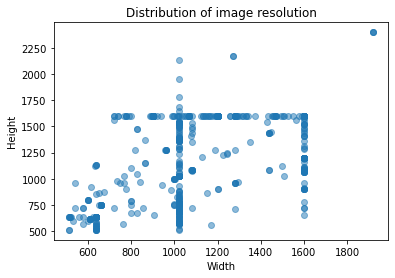

In [ ]:
# Visualize Image Resolutions
%matplotlib inline
plt.scatter(image_df.Width, image_df.Height, alpha=0.5)
plt.title("Distribution of image resolution" )
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [ ]:
#visualize Height/Width with countplot
sns.displot(x="Height", data=image_df)
sns.displot(x="Width", data=image_df)

In [ ]:
#create a df with differnt image resolutions and count them
imgsize_count= image_df.Size.value_counts().to_frame()

#get most most commom image resolutions 
mask1= imgsize_count.Size >=5

imgsize_count.loc[mask1,:]

In [18]:
#filter Dataframe based on height and width (imag resolution)
image_df.loc[(image_df.Height >= 460) & (image_df.Width >= 460), :]

FileName  ... Aspect_Ratio
0     /content/drive/MyDrive/training_demo/images/dr...  ...         1.00
1     /content/drive/MyDrive/training_demo/images/dr...  ...         1.33
2     /content/drive/MyDrive/training_demo/images/dr...  ...         0.75
4     /content/drive/MyDrive/training_demo/images/dr...  ...         1.33
11    /content/drive/MyDrive/training_demo/images/dr...  ...         1.33
...                                                 ...  ...          ...
1442  /content/drive/MyDrive/training_demo/images/dr...  ...         0.75
1443  /content/drive/MyDrive/training_demo/images/dr...  ...         0.75
1444  /content/drive/MyDrive/training_demo/images/dr...  ...         1.38
1445  /content/drive/MyDrive/training_demo/images/dr...  ...         0.94
1446  /content/drive/MyDrive/training_demo/images/dr...  ...         0.75

[1051 rows x 5 columns]